# Making Custom Colourmaps for Matplotlib
For the JHU Visualization Discussion Group: November 9, 2016

In this notebook, we will go through how to create a custom colour bar for matplotlib. Please feel free to follow along. 

In [44]:
# Required imports:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

Creating an image to produce colour maps for:

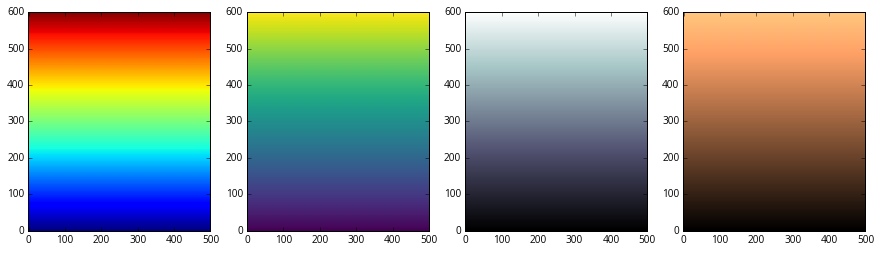

In [46]:
tmp_im = np.arange(600).reshape((-1, 1)) * np.ones(500).reshape((1,-1))
plt.figure(figsize=(15, 10))
plt.subplot(141)
plt.imshow(tmp_im, origin='lower', interpolation='nearest', cmap=plt.cm.jet)
plt.subplot(142)
plt.imshow(tmp_im, origin='lower', interpolation='nearest', cmap=plt.cm.viridis)
plt.subplot(143)
plt.imshow(tmp_im, origin='lower', interpolation='nearest', cmap=plt.cm.bone)
plt.subplot(144)
plt.imshow(tmp_im, origin='lower', interpolation='nearest', cmap=plt.cm.copper)


Also useful for setting colours for categorical data:

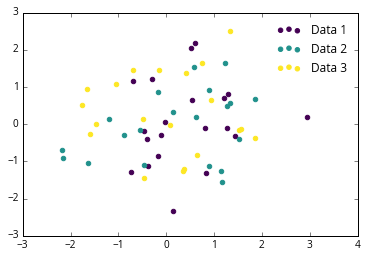

In [47]:
x1 = np.random.randn(20)
y1 = np.random.randn(20)

x2 = np.random.randn(20)
y2 = np.random.randn(20)

x3 = np.random.randn(20)
y3 = np.random.randn(20)

plt.scatter(x1, y1, color=plt.cm.viridis(0), s=20, label='Data 1')
plt.scatter(x2, y2, color=plt.cm.viridis(0.5), s=20, label='Data 2')
plt.scatter(x3, y3, color=plt.cm.viridis(1.0), s=20, label='Data 3')
plt.legend(frameon=False)

## Useful tool: Converting Hex Colours to RGB

In [17]:
conv = matplotlib.colors.ColorConverter()
conv.to_rgb('#ffff22')

(1.0, 1.0, 0.13333333333333333)

## Making a colour dictionary

This is a dictionary with lists of tuples for 'red', 'blue', 'green', and optionally, 'alpha', for instance:

```
cdict = {'red':   [(0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'blue':  [(0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)]}

```

In [63]:
redarr = [
    (0.0, 0, 1.0),
    (0.5, 1.0, 0.0),
    (1.0, 1.0, 1.0)
]

bluearr = [
    (0.0, 1.0, 0.0),
    (0.5, 1.0, 1.0),
    (1.0, 1.0, 1.0)
]

greenarr = [
    (0.0, 1.0, 1.0),
    (0.5, 1.0, 1.0),
    (1.0, 1.0, 1.0)
]

cdict1 = {'red':redarr, 'green':greenarr, 'blue':bluearr}

## Turning your colour dictionary into a colour map:

You can use the `matplotlib.colors.LinearSegmentedColormap` to turn this into a colour map object:

In [64]:
cmap1 = matplotlib.colors.LinearSegmentedColormap('MyColormap', cdict1, N=1E3)

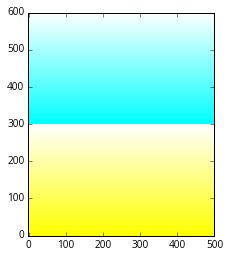

In [65]:
plt.imshow(tmp_im, origin='lower', interpolation='nearest', cmap=cmap1)

Can also add an alpha value:

In [66]:
alphaarr = [
    (0.0, 0.0, 1.0),
    (0.5, 0.0, 0.0),
    (1.0, 1.0, 0.0),
]

cdict1['alpha'] = alphaarr

cmap2 = matplotlib.colors.LinearSegmentedColormap('MyColormapWAlpha', cdict1, N=256)

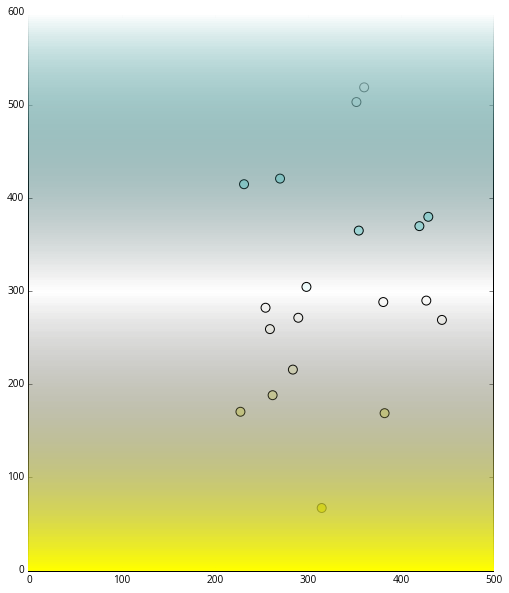

In [73]:
plt.figure(figsize=(10, 10))
plt.scatter((x1 + 3)*100, (y1+3) * 100, c=y1, cmap=cmap2, s=80, zorder=1)
plt.imshow(tmp_im, origin='lower', interpolation='nearest', cmap=cmap2, zorder=20)